## Data Overview

In [123]:
#import required libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, Embedding
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [124]:
#read csv file
df=pd.read_csv('Final_News_DF_Labeled_ExamDataset.csv')
df.head()

,LABEL,according,agency,ahead,alabama,amazon,america,american,announced,appeared,...,wolverines,women,work,working,world,wrote,year,years,york,young
0,politics,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
#check its shape
df.shape

(1493, 301)

## Data Preparation

In [126]:
#x values
X = df.iloc[:,1:].values
X


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [127]:
#y values
y=df['LABEL'].values
y

array(['politics', 'politics', 'politics', ..., 'science', 'science',
       'science'], dtype=object)

In [128]:
#label encoding
le = LabelEncoder()
y_enc = le.fit_transform(y)
print(y_enc)

[1 1 1 ... 2 2 2]


In [129]:
#mapping of labels
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'football': 0, 'politics': 1, 'science': 2}


In [130]:
#one hot encoding
one_hot = OneHotEncoder()
y_onehot = one_hot.fit_transform(y_enc.reshape(-1, 1)).toarray()
print(y_onehot)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


## Split the data

In [131]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

## ANN Model

In [132]:
#ANN Model
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  
])

#model summary
ann_model.summary()

/Users/saaijeeshsn/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 64)             │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,443 (83.76 KB)

 Trainable params: 21,443 (83.76 KB)

 Non-trainable params: 0 (0.00 B)

In [133]:
#compile the model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
ann_history = ann_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=16)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4418 - loss: 1.0597 - val_accuracy: 0.6689 - val_loss: 0.9071
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.7128 - loss: 0.8069 - val_accuracy: 0.7525 - val_loss: 0.6670
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.7864 - loss: 0.5695 - val_accuracy: 0.7492 - val_loss: 0.5874
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.8281 - loss: 0.4259 - val_accuracy: 0.7559 - val_loss: 0.6017
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.8619 - loss: 0.3754 - val_accuracy: 0.7391 - val_loss: 0.6274
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.8924 - loss: 0.2950 - val_accuracy: 0.7559 - val_loss: 0.6735
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.9015 - loss: 0.2604 - val_accuracy: 0.7625 - val_loss: 0.7231
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.9068 - loss: 0.2536 - val_accuracy: 0.76

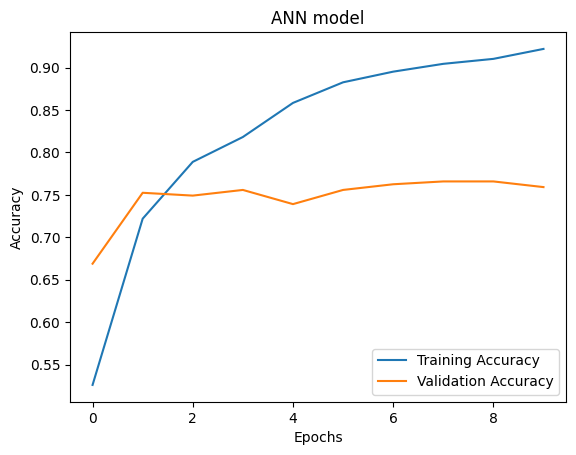

In [134]:
#plot training and validation accuracy
plt.plot(ann_history.history['accuracy'], label='Training Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ANN model')
plt.legend(loc='lower right')
plt.show()

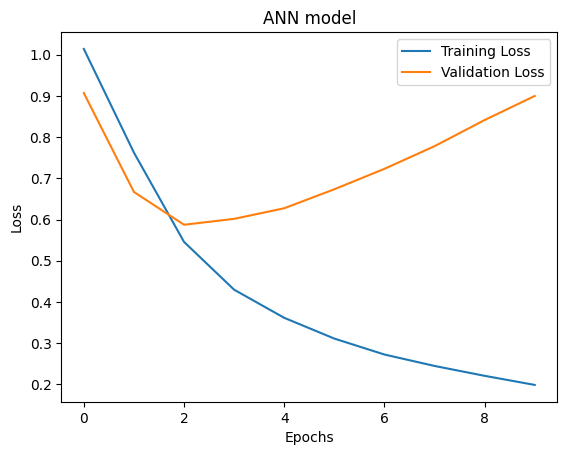

In [135]:
#plot training and validation loss
plt.plot(ann_history.history['loss'], label='Training Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ANN model')
plt.legend()
plt.show()

In [136]:
#passing test data in the model
test_loss, test_accuracy = ann_model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.7588 - loss: 0.9472


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


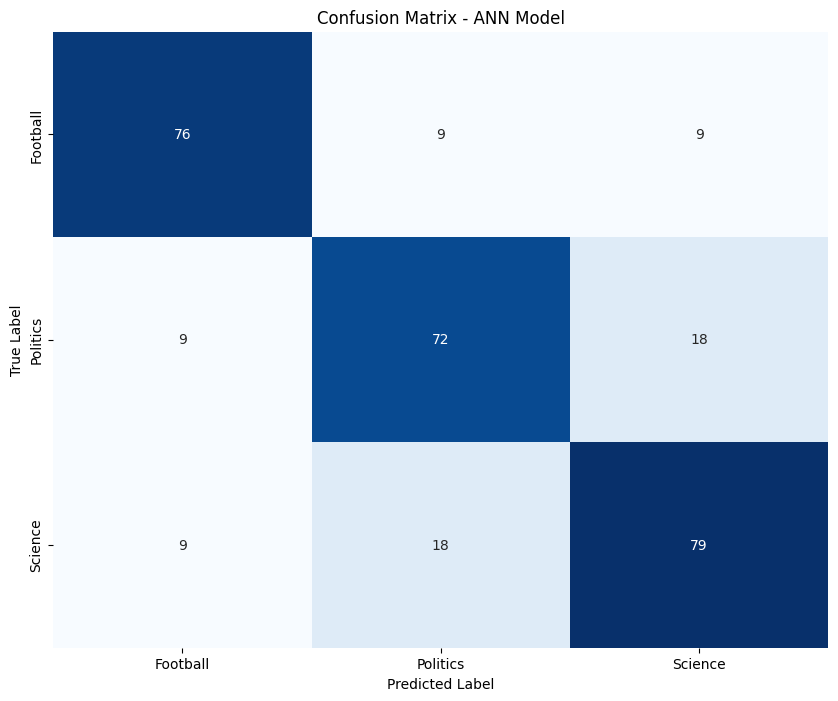

In [137]:
#label names
class_names = ['Football','Politics','Science']

#compute predictions
y_pred_1 = np.argmax(ann_model.predict(X_test), axis=-1)

#confusion matrix
cm_1 = confusion_matrix(np.argmax(y_test, axis=-1), y_pred_1)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - ANN Model')
plt.show()

## CNN model

In [138]:
X_train_cnn = X_train[..., None] 
X_test_cnn = X_test[..., None]

#CNN Model
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

#model summary
cnn_model.summary()

/Users/saaijeeshsn/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 298, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 149, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 9536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │       610,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 610,819 (2.33 MB)

 Trainable params: 610,819 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

In [139]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
cnn_history = cnn_model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=10, batch_size=16)

Epoch 1/10


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5656 - loss: 0.8997 - val_accuracy: 0.7124 - val_loss: 0.6503
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7712 - loss: 0.5473 - val_accuracy: 0.7559 - val_loss: 0.6449
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8303 - loss: 0.4296 - val_accuracy: 0.7258 - val_loss: 0.6523
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8352 - loss: 0.4074 - val_accuracy: 0.7358 - val_loss: 0.6974
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8575 - loss: 0.3493 - val_accuracy: 0.7224 - val_loss: 0.7490
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8629 - loss: 0.3152 - val_accuracy: 0.7391 - val_loss: 0.8286
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8822 - loss: 0.2778 - val_accuracy: 0.7258 - val_loss: 0.9522
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9098 - loss: 0.2381 - val_accuracy: 0.7358 - val_loss: 0.9862
Epo

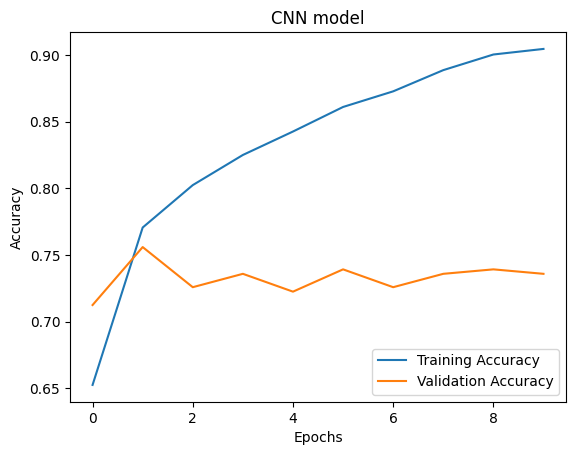

In [140]:
#plot training and validation accuracy
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN model')
plt.legend(loc='lower right')
plt.show()

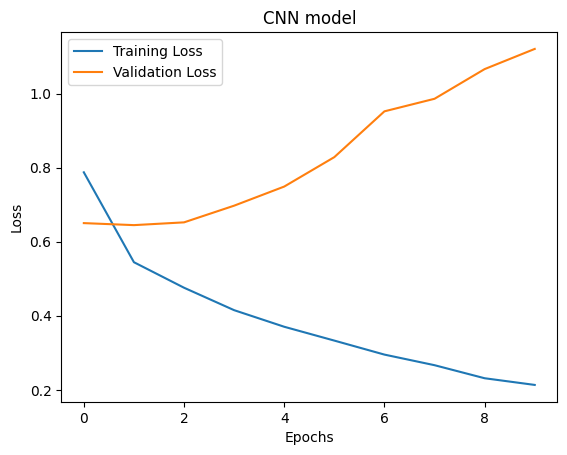

In [141]:
#plot training and validation loss
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN model')
plt.legend()
plt.show()

In [142]:
#passing test data in the model
test_loss, test_accuracy = cnn_model.evaluate(X_test_cnn, y_test)

 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7812 - loss: 1.7220

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7385 - loss: 1.2104 


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


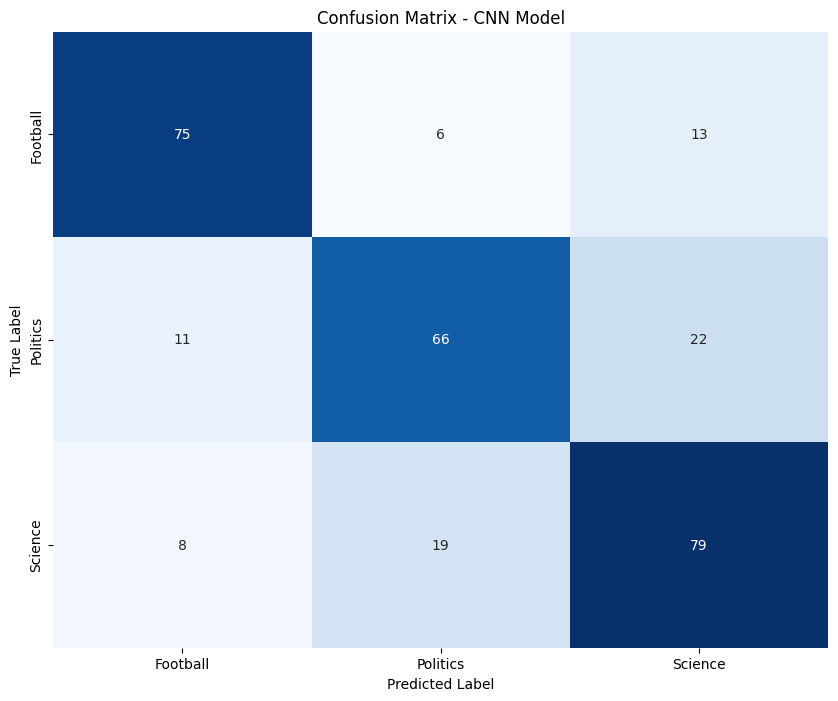

In [143]:
#label names
class_names = ['Football','Politics','Science']

#compute predictions
y_pred_2 = np.argmax(cnn_model.predict(X_test_cnn), axis=-1)

#confusion matrix
cm_2 = confusion_matrix(np.argmax(y_test, axis=-1), y_pred_2)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - CNN Model')
plt.show()

## LSTM model

In [144]:
X_train_lstm = X_train[..., None]  
X_test_lstm = X_test[..., None]

#LSTM Model
lstm_model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(X_train_lstm.shape[1], 1)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

#model summary
lstm_model.summary()

/Users/saaijeeshsn/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,251 (83.01 KB)

 Trainable params: 21,251 (83.01 KB)

 Non-trainable params: 0 (0.00 B)

In [145]:
#compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
lstm_history = lstm_model.fit(X_train_lstm, y_train, validation_data=(X_test_lstm, y_test), epochs=10, batch_size=16)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3652 - loss: 1.0978 - val_accuracy: 0.3813 - val_loss: 1.0919
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3557 - loss: 1.0958 - val_accuracy: 0.4348 - val_loss: 1.0714
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4168 - loss: 1.0685 - val_accuracy: 0.4515 - val_loss: 1.0450
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4220 - loss: 1.0466 - val_accuracy: 0.4515 - val_loss: 1.0357
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4491 - loss: 1.0407 - val_accuracy: 0.4615 - val_loss: 1.0368
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4692 - loss: 1.0241 - val_accuracy: 0.4749 - val_loss: 1.0461
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4606 - loss: 1.0161 - val_accuracy: 0.4682 - val_loss: 1.0873
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4666 - loss: 1.0034 - val_accuracy: 0.4548 - v

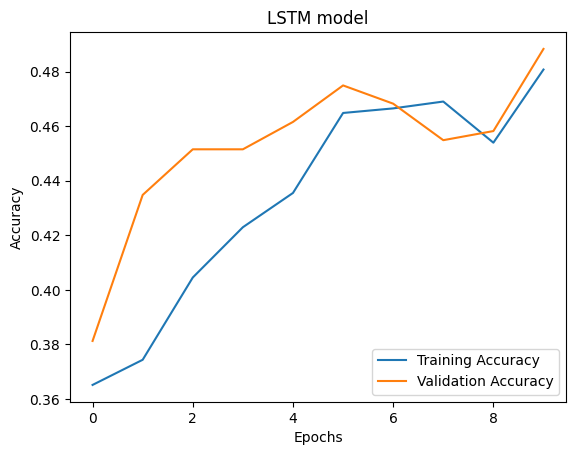

In [146]:
#plot training and validation accuracy
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM model')
plt.legend(loc='lower right')
plt.show()

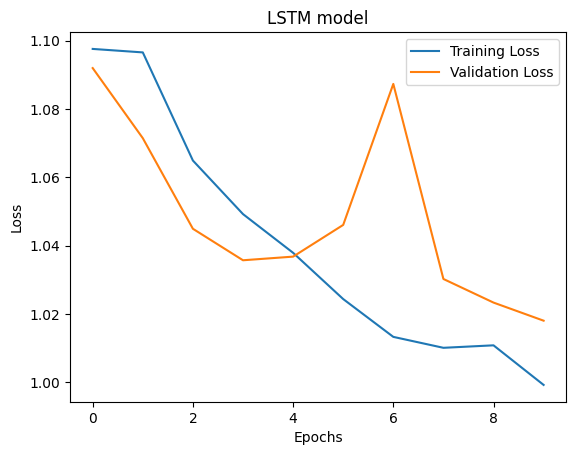

In [147]:
#plot training and validation loss
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM model')
plt.legend()
plt.show()

In [148]:
#passing test data in the model
test_loss, test_accuracy = lstm_model.evaluate(X_test_lstm, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4819 - loss: 1.0332


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


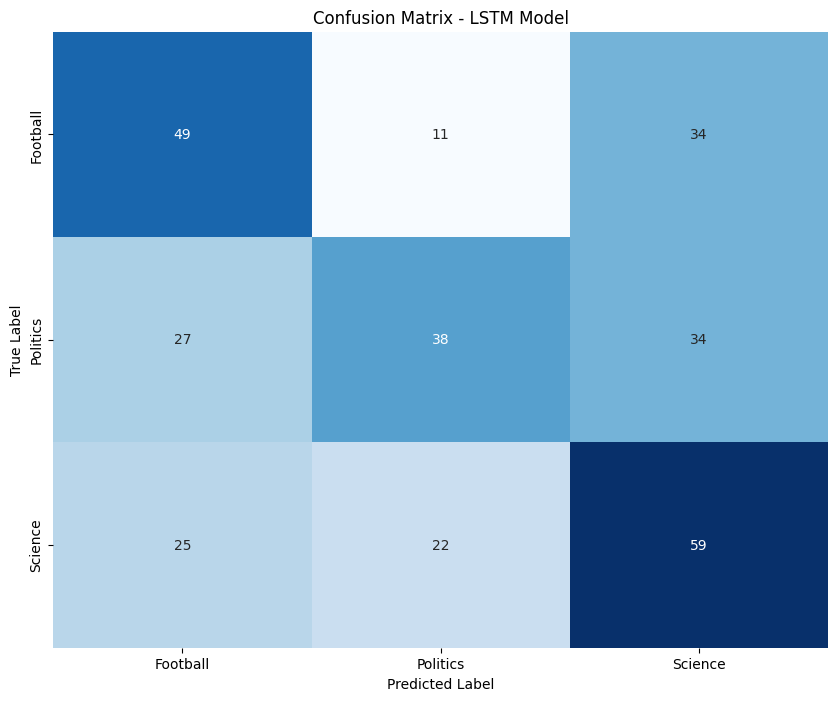

In [149]:
#label names
class_names = ['Football','Politics','Science']

#compute predictions
y_pred_3 = np.argmax(lstm_model.predict(X_test_lstm), axis=-1)

#confusion matrix
cm_3 = confusion_matrix(np.argmax(y_test, axis=-1), y_pred_3)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_3, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LSTM Model')
plt.show()